CREATED: 2021-12-22 \
What % of all proteins are specific (separately species and genus) \
How many specific genes are there 
  * on average
  * min
  * max
  * standard deviation
  * histogram
  * quartiles \

For each species:
  * how many genes are specific - both count and percentage
  * top 10
  * bottom 10

In [2]:
import json
from pprint import pprint

try:
    metadata_file = open("../data/metadata.json", "r")
except FileNotFoundError:
    print("\033[91m\n" + "No metadata file found, aborting" + "\n\033[0m")

try:
    trg_file = open("../large_data/trg.json", "r")
except FileNotFoundError:
    print("\033[91m\n" + "No trg file found, aborting" + "\n\033[0m")
metadata = json.load(metadata_file)
specific_genes_data = json.load(trg_file)

metadata_file.close()
trg_file.close()


Total number of genomes: 45555
Total number of genes: 147769736

In [3]:
total_genomes = len(metadata)
print(total_genomes)
total_genes = 0
for genome in metadata:
    total_genes += metadata[genome]["protein_count"]
print(total_genes)


45555
147769736


Total genes specific to species: 4150013
Total genes specific to genus: 2638854

In [4]:
total_genes_specific_to_species = 0
total_genes_specific_to_genus = 0
for genome in specific_genes_data:
    for gene in specific_genes_data[genome]:
        if gene[1] == 1:
            total_genes_specific_to_species += 1
        elif gene[1] == 0:
            total_genes_specific_to_genus += 1
        else:
            print("error")
print(total_genes_specific_to_species)
print(total_genes_specific_to_genus)


4150013
2638854


Average number of genes: 3243.7654703106136 \
Average number of species-specific genes: 91.09895730435737 \
Average number of genus-specific genes: 57.92676983865657 \
\
Percentage of genes that are species-specific: 2.8084323030799756 \
Percentage of genes that are species-specific: 1.7857878557758267 

In [5]:
print(total_genes / total_genomes)
print(total_genes_specific_to_species / total_genomes)
print(total_genes_specific_to_genus / total_genomes)

print((total_genes_specific_to_species / total_genes) * 100)
print((total_genes_specific_to_genus / total_genes) * 100)


3243.7654703106136
91.09895730435737
57.92676983865657
2.8084323030799756
1.7857878557758267


In [8]:
count_specific_for_each_genome = dict()
count_values_genus = list()
count_values_species = list()
for genome in specific_genes_data:
    genomes_protein_count = metadata[genome]["protein_count"]
    count_specific_for_each_genome[genome] = {
        "genus": 0,
        "species": 0,
        "protein_count": genomes_protein_count,
    }
    for gene in specific_genes_data[genome]:
        if gene[1] == 1:
            count_specific_for_each_genome[genome]["species"] += 1
        elif gene[1] == 0:
            count_specific_for_each_genome[genome]["genus"] += 1

    genomes_species_total = count_specific_for_each_genome[genome]["species"]
    genomes_genus_total = count_specific_for_each_genome[genome]["genus"]
    count_specific_for_each_genome[genome]["genus_percentage"] = (
        genomes_genus_total / genomes_protein_count
    ) * 100
    count_specific_for_each_genome[genome]["species_percentage"] = (
        genomes_species_total / genomes_protein_count
    ) * 100
    count_values_genus.append(genomes_genus_total)
    count_values_species.append(genomes_species_total)

print(count_specific_for_each_genome["GB_GCA_003218535.1"])


{'genus': 56, 'species': 140, 'protein_count': 2963, 'genus_percentage': 1.889976375295309, 'species_percentage': 4.724940938238272}


Min number of species specific genes: 0 \
Min number of genus specific genes: 0 \
Max number of species specific genes: 4951 \
Max number of genus specific genes: 2211 \

In [16]:
print(
    min(count_values_species),
    min(count_values_genus),
    max(count_values_species),
    max(count_values_genus),
)

0 0 4951 2211


No genomes with no species or genus specific genus - they were not included in trg.json

In [9]:
print(total_genomes)
print(len(count_specific_for_each_genome))
for genome in count_specific_for_each_genome:
    if (
        count_specific_for_each_genome[genome]["genus"] == 0
        and count_specific_for_each_genome[genome]["species"] == 0
    ):
        raise ValueError


45555
45544


Add zeroes to lists until their length equalts total genomes

In [45]:
while len(count_values_species) < total_genomes:
    count_values_species.append(0)
while len(count_values_genus) < total_genomes:
    count_values_genus.append(0)

print(len(count_values_genus))
print(len(count_values_species))
print(total_genomes)


45555
45555
45555


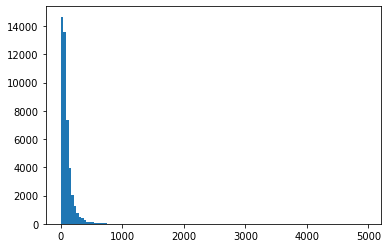

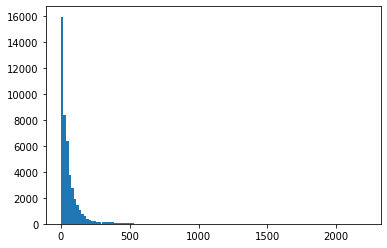

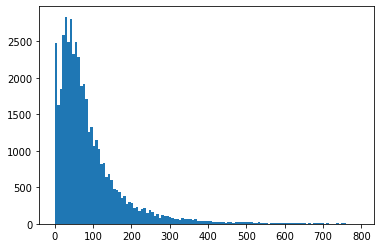

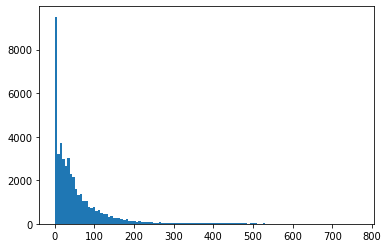

In [48]:
from matplotlib import pyplot as plt

plt.hist(count_values_species, bins=120)
plt.show()
plt.hist(count_values_genus, bins=120)
plt.show()

plt.hist([x for x in count_values_species if x < 800], bins=120)
plt.show()
plt.hist([x for x in count_values_genus if x < 800], bins=120)
plt.show()


Number of genomes with no specific genes:
* no species specific: 250
* no genus specific: 6978
* no both at the same time: 11

In [51]:
print(count_values_species.count(0))
print(count_values_genus.count(0))

print(total_genomes - len(count_specific_for_each_genome))


250
6978
11


Standard deviation:
* species: 105.21635912768656
* genus: 81.91432620050345

In [52]:
import statistics

print(statistics.pstdev(count_values_species))
print(statistics.pstdev(count_values_genus))


105.21635912768656
81.91432620050345


Median:
* species: 63
* genus: 33

In [54]:
print(statistics.median(count_values_species))
print(statistics.median(count_values_genus))


63
33


Quantiles

* Q1 species :  34.0
* Q2 species :  63.0
* Q3 species :  113.0
* Q1 genus :  10.0
* Q2 genus :  33.0
* Q3 genus :  72.0

In [53]:
import numpy as np

print("Q1 species : ", np.quantile(count_values_species, 0.25))
print("Q2 species : ", np.quantile(count_values_species, 0.50))
print("Q3 species : ", np.quantile(count_values_species, 0.75))

print("Q1 genus : ", np.quantile(count_values_genus, 0.25))
print("Q2 genus : ", np.quantile(count_values_genus, 0.50))
print("Q3 genus : ", np.quantile(count_values_genus, 0.75))


Q1 species :  34.0
Q2 species :  63.0
Q3 species :  113.0
Q1 genus :  10.0
Q2 genus :  33.0
Q3 genus :  72.0


Top 10 - percentage

In [35]:
genus_percentages = list()
species_percentages = list()
for name in count_specific_for_each_genome:
    genus_percentages.append([x,count_specific_for_each_genome[name]['genus_percentage']])
    species_percentages.append([x,count_specific_for_each_genome[name]['species_percentage']])
genus_percentages.sort(key = lambda x: -x[1])
species_percentages.sort(key = lambda x: -x[1])
print("Top 10 genus")
pprint(genus_percentages[:10])
print("Top 10 species")
pprint(species_percentages[:10])

Top 10 genus
[['GB_GCA_003452735.1', 72.7214786488209],
 ['GB_GCA_003452735.1', 69.03553299492386],
 ['GB_GCA_003452735.1', 47.964669738863286],
 ['GB_GCA_003452735.1', 47.156726768377254],
 ['GB_GCA_003452735.1', 38.770281810418446],
 ['GB_GCA_003452735.1', 32.80055594162613],
 ['GB_GCA_003452735.1', 30.0],
 ['GB_GCA_003452735.1', 27.30125523012552],
 ['GB_GCA_003452735.1', 26.835043409629044],
 ['GB_GCA_003452735.1', 26.626323751891075]]
Top 10 species
[['GB_GCA_003452735.1', 63.8235294117647],
 ['GB_GCA_003452735.1', 62.52115059221658],
 ['GB_GCA_003452735.1', 60.42090970807875],
 ['GB_GCA_003452735.1', 59.03183498271134],
 ['GB_GCA_003452735.1', 58.15109343936382],
 ['GB_GCA_003452735.1', 52.118644067796616],
 ['GB_GCA_003452735.1', 49.898305084745765],
 ['GB_GCA_003452735.1', 45.49340933380834],
 ['GB_GCA_003452735.1', 43.87990762124711],
 ['GB_GCA_003452735.1', 43.6684896928902]]


Top 10 - count

In [34]:
genus_counts = list()
species_counts = list()
for name in count_specific_for_each_genome:
    genus_counts.append([name,count_specific_for_each_genome[name]['genus']])
    species_counts.append([name,count_specific_for_each_genome[name]['species']])
genus_counts.sort(key = lambda x: -x[1])
species_counts.sort(key = lambda x: -x[1])
print("Top 10 genus")
pprint(genus_counts[:10])
print("Top 10 species")
pprint(species_counts[:10])


Top 10 genus
[['GB_GCA_000715635.1', 2211],
 ['GB_GCA_007858575.1', 1683],
 ['GB_GCA_000715615.1', 1642],
 ['GB_GCA_000715605.1', 1523],
 ['RS_GCF_003339775.1', 1249],
 ['GB_GCA_003248315.1', 1155],
 ['RS_GCF_000200735.1', 1141],
 ['RS_GCF_001886855.1', 1020],
 ['RS_GCF_004010275.1', 939],
 ['RS_GCF_001647025.1', 846]]
Top 10 species
[['GB_GCA_002685535.1', 4951],
 ['GB_GCA_000715855.1', 3532],
 ['RS_GCF_001499735.1', 2878],
 ['GB_GCA_000715635.1', 2740],
 ['GB_GCA_000715825.1', 2535],
 ['GB_GCA_002591725.1', 1953],
 ['GB_GCA_001312805.1', 1833],
 ['RS_GCF_000178855.1', 1635],
 ['GB_GCA_003154095.1', 1607],
 ['GB_GCA_000715615.1', 1560]]
